<a href="https://colab.research.google.com/github/tsatir/Thinkful-Data_Science/blob/master/self_sufficiencyexam_thinkful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are strings.**

In [0]:
def reverse_string(xx):
    z = ''
    for i in xx:
      z = i + z
    return(z)

In [2]:
reverse_string('tugce')

'ecgut'

**Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:**

In [0]:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """
    return (b_given_a * a)/((a*b_given_a)+((1-a)*b_given_not_a))

**Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.**

**a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow, given their meaning?**

 - Stolen bases per game
 - Wins
 - Earned run average


**b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.**

- https://rdrr.io/rforge/Lahman/man/Teams.html

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
teams = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv')

In [6]:
#teams.describe()
#teams.info()
teams.head(2)


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60,19.0,73.0,NaN,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60,22.0,69.0,NaN,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1


In [7]:
teams_1995 = teams[teams['yearID']>= 1995]
teams_1995[['SB','W','ERA']].describe()

,SB,W,ERA
count,624.000000,624.000000,624.000000
mean,98.673077,80.560897,4.301603
std,31.800727,11.505856,0.554768
min,31.000000,43.000000,2.940000
25%,73.000000,72.000000,3.907500
50%,96.000000,80.000000,4.280000
75%,119.000000,90.000000,4.690000
max,201.000000,116.000000,6.380000


[Text(0.5, 1.0, 'Stolen Bases Histogram')]

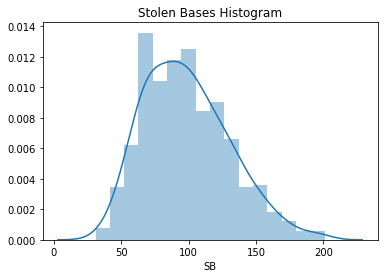

In [8]:
stolen_bases_per_game = sns.distplot(teams_1995['SB'])
stolen_bases_per_game.set(title='Stolen Bases Histogram')

*The stolen bases distribution looks like a poisson distribution which represents the number of times a given event will occur during a given time interval. Data can range from 0 to approaching .*

[Text(0.5, 0, 'Wins')]

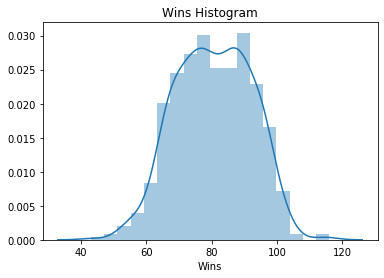

In [9]:
wins = sns.distplot(teams_1995['W'])
wins.set(title = 'Wins Histogram')
wins.set(xlabel='Wins')

Wins histogram looks like a normal distribution.

[Text(0.5, 1.0, 'Earned Run Average Histogram')]

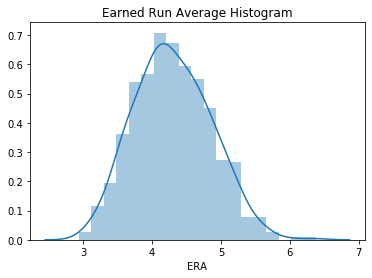

In [10]:
earned_run_avg = sns.distplot(teams_1995['ERA'])
earned_run_avg.set(title='Earned Run Average Histogram')

*ERA histogram looks like a  "normal," or "normally distributed,". Most values cluster in the center of the range, with the rest tapering off symmetrically to the left and the right.*

**b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.**

In [0]:
teams_AL = teams[(teams['lgID']=='AL') & (teams['yearID']>=1995)]
teams_NL = teams[(teams['lgID']=='NL') & (teams['yearID']>=1995)]

I am new to United States and to be honest I don't know anything about baseball. During this short time I tried to learn but I did't like it and there are so many rules to understand, baseball analytics is another big field:) . So, in order to make everything more clearer for me I divide dataset according to their leagues and chose teams that have similar rankings (CLE, BOS), best ranking (NYY) and two worst rankings (TEX,TOR)

In [0]:
selected_teams = ['NYY', 'CLE', 'BOS','TEX','TOR']
selected_teams_AL = teams_AL.loc[teams_AL['teamIDBR'].isin(selected_teams)]

In [13]:
selected_teams_AL.head()
#selected_teams_AL.info()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2183,1995,AL,BOS,BOS,E,1,144,72.0,86,58,Y,N,N,N,791,4997,1399,286,31,175,560,923.0,99.0,44.0,NaN,NaN,698,630,4.39,7,9,39,3876,1338,127,476,888,120,151.0,0.97,Boston Red Sox,Fenway Park II,2164410.0,103,103,BOS,BOS,BOS
2188,1995,AL,CLE,CLE,C,1,144,72.0,100,44,Y,N,Y,N,840,5028,1461,279,23,207,542,766.0,132.0,53.0,NaN,NaN,607,554,3.83,10,10,50,3903,1261,135,445,926,101,142.0,0.98,Cleveland Indians,Jacobs Field,2842745.0,101,99,CLE,CLE,CLE
2198,1995,AL,NYA,NYY,E,2,145,73.0,79,65,N,Y,N,N,749,4947,1365,280,34,122,625,851.0,50.0,30.0,NaN,NaN,688,651,4.56,18,5,35,3852,1286,159,535,908,73,121.0,0.98,New York Yankees,Yankee Stadium II,1705263.0,99,98,NYY,NYA,NYA
2207,1995,AL,TEX,TEX,W,3,144,72.0,74,70,N,N,N,N,691,4913,1304,247,24,138,526,877.0,90.0,47.0,NaN,NaN,720,665,4.66,14,4,34,3855,1385,152,514,838,98,156.0,0.98,Texas Rangers,The Ballpark at Arlington,1985910.0,103,103,TEX,TEX,TEX
2208,1995,AL,TOR,TOR,E,5,144,72.0,56,88,N,N,N,N,642,5036,1309,275,27,140,492,906.0,75.0,16.0,NaN,NaN,777,701,4.88,16,8,22,3876,1336,145,654,894,97,131.0,0.98,Toronto Blue Jays,Skydome,2826483.0,99,100,TOR,TOR,TOR


In [14]:
selected_teams_AL['Rank_all'] = selected_teams_AL.groupby(['teamID'])['Rank'].cumsum()

selected_teams = ['NYA', 'CLE', 'BOS','TEX','TOR']

NYA = selected_teams_AL[selected_teams_AL['teamID'] == 'NYA']
NYA['New York Yankees'] = NYA['Rank'].cumsum()

CLE = selected_teams_AL[selected_teams_AL['teamID'] == 'CLE']
CLE['Cleveland Indians'] = CLE['Rank'].cumsum()

BOS = selected_teams_AL[selected_teams_AL['teamID'] == 'BOS']
BOS['Boston Red Sox'] = BOS['Rank'].cumsum()

TEX = selected_teams_AL[selected_teams_AL['teamID'] == 'TEX']
TEX['Texas Rangers'] = TEX['Rank'].cumsum()

TOR = selected_teams_AL[selected_teams_AL['teamID'] == 'TOR']
TOR['Toronto Blue Jays'] = TOR['Rank'].cumsum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

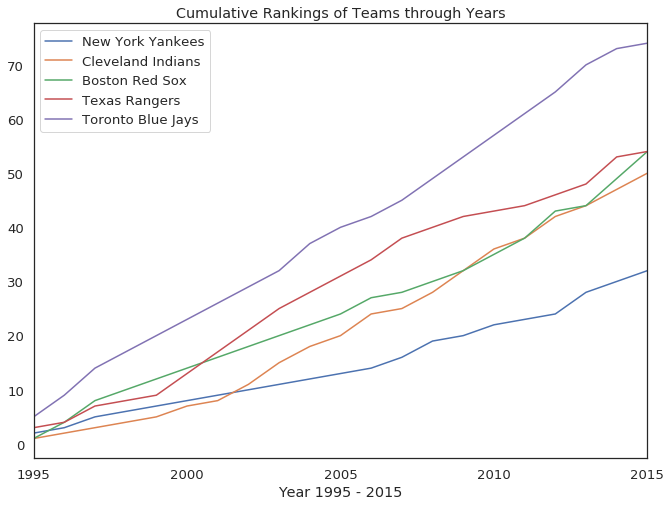

In [15]:
sns.set(style='white', font_scale=1.2)
plt.figure(figsize = (11,8))
ax = plt.gca(title = 'Cumulative Rankings of Teams through Years')
NYA.plot(kind='line',x='yearID',y='New York Yankees',ax=ax, )
CLE.plot(kind='line',x='yearID',y='Cleveland Indians',ax=ax)
BOS.plot(kind='line',x='yearID',y='Boston Red Sox',ax=ax)
TEX.plot(kind='line',x='yearID',y='Texas Rangers',ax=ax)
TOR.plot(kind='line',x='yearID',y='Toronto Blue Jays',ax=ax)
ax.locator_params(integer=True)
plt.xlabel('Year 1995 - 2015')

plt.show()

After a quick search online(https://www.electro-mech.com/team-sports/baseball/the-greatest-5-baseball-teams-in-the-us/), I saw NYA and BOS are classified as best teams in AL. When we look their rankings cumulativlely, NYA keeps first places throughtout years. However, CLE and BOS are very close to eachother. This takes me the next question. Why CLE is not classified in best teams ? I will look at different metrics such as 2B,3B hits scores and number of world series winnigs to find an explanation to article's choice of best team. 

In [16]:
new_teams = ['BOS','CLE']
BOS_CLE = selected_teams_AL[selected_teams_AL['teamID'].isin(new_teams)]

year_group = pd.cut(BOS_CLE['yearID'], [1994, 2005, 2015])
print("2B-3B Scores Table")
pd.pivot_table(BOS_CLE, values=['2B','3B'], index=year_group, columns=['name'], aggfunc=np.sum)

2B-3B Scores Table


2B                               3B                  
name         Boston Red Sox Cleveland Indians Boston Red Sox Cleveland Indians
yearID                                                                        
(1994, 2005]           3702              3395            351               308
(2005, 2015]           3355              3032            264               249

When we look at the 2B-3B Scores table, we see 3B are rare. 2B's are more comman. Let's look deeper to triple scores in each team. With the help of histograms, it looks like Boston Red Sox are more likely to have higher 3B scores. Comparing it with 2B scores, now we are sure 3B scores are extremely rare.

[Text(0.5, 1.0, 'Boston Red Sox 3B Scores Histogram')]

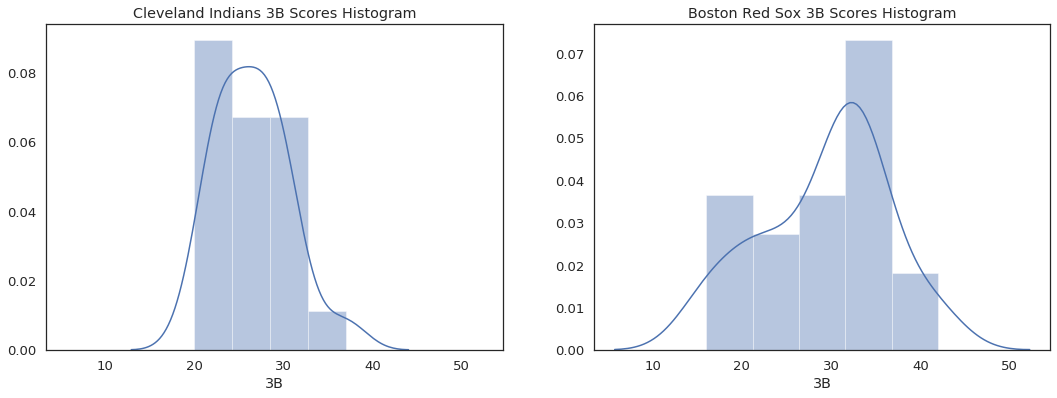

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=True)


sns.distplot(BOS_CLE[BOS_CLE['teamID']=='CLE']['3B'], ax=ax1)
ax1.set(title='Cleveland Indians 3B Scores Histogram')

sns.distplot(BOS_CLE[BOS_CLE['teamID']=='BOS']['3B'],ax=ax2)
ax2.set(title = 'Boston Red Sox 3B Scores Histogram')

What about hits and wins columns ? I learnt that hits are very important to win. Can hits have a relevant relationship with wins ?

In [0]:
#sns.pairplot(BOS_CLE)

The correlation between wins and hits by batters in BOS and CLE is (0.5612918760928449, 0.00011015016371048281)
We can say that we have a small p-value and there is a significant correlation between wins and hits by batters.It is important to have hits
But still, it doesn't show a difference between BOS and CLE. Both teams show similar performances.


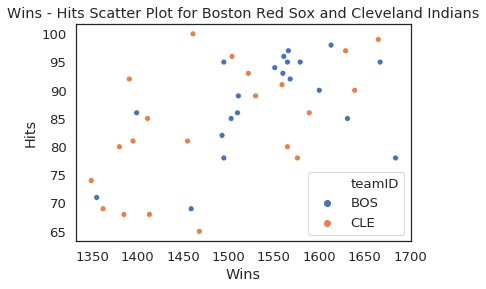

In [19]:
plt.title("Wins - Hits Scatter Plot for Boston Red Sox and Cleveland Indians")
sns.scatterplot(x="H", y="W",hue='teamID',data=BOS_CLE)
plt.xlabel("Wins")
plt.ylabel("Hits")

print("The correlation between wins and hits by batters in BOS and CLE is {}".format(stats.pearsonr(BOS_CLE['W'], BOS_CLE['H'])))
print("We can say that we have a small p-value and there is a significant correlation between wins and hits by batters.It is important to have hits")
print("But still, it doesn't show a difference between BOS and CLE. Both teams show similar performances.")

One thing I know from baseball is that winning World Series is a huge thing. I moved to D.C. 4 months ago and D.C. won WS for the first time. For a day, they closed the roads for a parade. Let's see who has more winning in world series.

In [20]:
pd.DataFrame(BOS_CLE.groupby('teamID')['WSWin'].value_counts())

WSWin
teamID WSWin       
BOS    N         18
       Y          3
CLE    N         21

We can see from the dataframe Boston Red Sox has 3 WS winning. Even though their rankings are similar, there is one sure thing that winning a world series brings the fame.Also, having more 3B scores helped to build this fame too. The writer of the article has a right to say that Boston Rex Sox is one of the best teams.

**Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. 
Plot the frequencies of the sample means. What distribution does this appear to follow?
Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].**

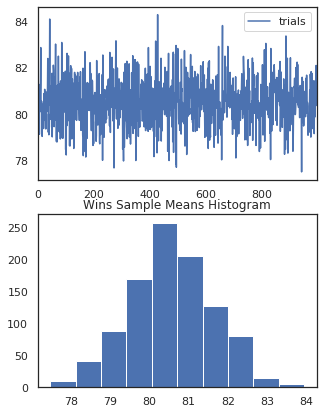

In [21]:
results = []
for num_trials in range(1,1000):
    trials = teams_1995['W'].sample(n=100)
    mean_of_trials = trials.mean()
    results.append(mean_of_trials)
	
df = pd.DataFrame({ 'trials' : results})
#sns.set()
sns.set(style='white', font_scale=1)

fig, axs = plt.subplots(2,1, figsize=(5, 7))
df.plot(ax=axs[0])


plt.title("Wins Sample Means Histogram")
means = [teams_1995['W'].sample(n=100).mean() for _ in range(1000)]
a1 = plt.hist(means)

*The resulting histogram is normally distributed around a mean of approximately 80.5 as we expected from Central Limit Thm.*

(array([  4.,  17.,  64., 155., 250., 242., 169.,  69.,  26.,   4.]),
 array([4.1274 , 4.16151, 4.19562, 4.22973, 4.26384, 4.29795, 4.33206,
        4.36617, 4.40028, 4.43439, 4.4685 ]),
 <a list of 10 Patch objects>)

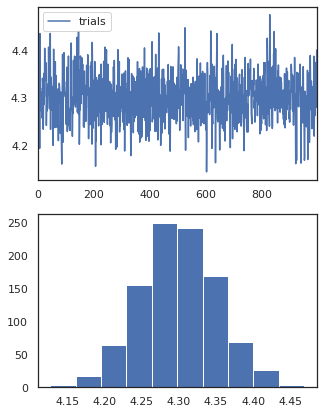

In [22]:
results_2 = []
for num_trials in range(1,1000):
    trials = teams_1995['ERA'].sample(n=100)
    mean_of_trials = trials.mean()
    results_2.append(mean_of_trials)
	
df2 = pd.DataFrame({ 'trials' : results_2})
fig, axs = plt.subplots(2,1, figsize=(5, 7))
df2.plot(ax=axs[0])

means_2 = [teams_1995['ERA'].sample(n=100).mean() for _ in range(1000)]
plt.hist(means_2)

*The resulting histogram is normally distributed around a mean of approximately 4.3 as we expected from Central Limit Thm.*